## Big Data Group-Work -13March2023
## By: Mohammad Rahim Bahawi

## Introduction
Transportation accidents annually account for over a million fatalities and fifty million injuries. It is predicted that by the year 2030, road accidents will be the fifth-leading cause of mortality globally. The World Health Organization (2013) reports that highway crashes cause immeasurable human misery, countless deaths, and huge healthcare and lost-income expenses.
The time of day, ages and sexes of passengers, road surface conditions, weather, potential contributing factors, roadway type, roadway lighting, speed limits, basic roadway geometrics (curve, grade, etc.), crash type (rollover, rear-end, etc.), objects struck, drivers' sexes, and driving histories are all pieces of data that law enforcement agencies may collect. Our understanding of the many factors that affect the likelihood and severity (in terms of personal injury) of highway crashes can be greatly improved by using new methods that deal with complex issues like unobserved heterogeneity, risk compensation, spatial and temporal correlations, and others. Then we can take the necessary steps to reduce the number of traffic-related deaths and accidents across the country.

## Business Objective and Context
The business goal is to determine the degree of casualties so that the government can focus on reducing fatalities and serious injuries caused by traffic accidents in high-risk regions and along high-accident routes. The data could also be used by the government to assess the efficacy of traffic safety programmes.

The number of seriously injured people treated each day **casualty severity** is our Target variable while and other relevant variables such as vehicle reference, casualty reference,casualty class,sex of the casualty,age of the casualty, number of casualties,car passenger, speed limit, weather condition and... will be as our exploratory variables in this prediction.

## Loading Datasets
In this part we are planning to load two datasets the accident and casualty.
Our Target varible in this model is Casualty_Serverity and our exploratoy variables are the combination of two datasets that we have loaded them as DS1_Accident_Casualty_2022 and DS2_Casualty_Casualty_2022

### For accessing the datasets you can use following Github URL for the both datasets.

  DS1_Casualty=https://raw.githubusercontent.com/rbahawi/Big_Data_Dataset/main/dft_road_casualty_statistics_casualty_provisional_mid_year_unvalidated_2022.csv
  DS2_Accident=https://raw.githubusercontent.com/rbahawi/Big_Data_Dataset/main/dft_road_casualty_statistics_accident_provisional_mid_year_unvalidated_2022.csv  

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [26]:
DS1_Casualty = pd.read_csv("https://raw.githubusercontent.com/rbahawi/Big_Data_Dataset/main/dft_road_casualty_statistics_casualty_provisional_mid_year_unvalidated_2022.csv")
DS1_Casualty.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [27]:
DS1_Casualty.columns

Index(['status', 'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

In [28]:
# For checking size of the datasets and more infroamtion regarding with datasets we can using below codes.
DS1_Casualty.shape

(61352, 20)

In [29]:
DS1_Casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

In [30]:
DS2_Accident = pd.read_csv('https://raw.githubusercontent.com/rbahawi/Big_Data_Dataset/main/dft_road_casualty_statistics_accident_provisional_mid_year_unvalidated_2022.csv')
DS2_Accident.head()

,status,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,Unvalidated,2022010369821,2022,010369821,524257.0,172324.0,NaN,NaN,1,3,...,9,1,8,1,0,0,-1,3,-1,E01003464
1,Unvalidated,2022010363954,2022,010363954,539657.0,175987.0,NaN,NaN,1,3,...,1,1,1,1,0,0,-1,3,-1,E01003202
2,Unvalidated,2022070199385,2022,070199385,356998.0,389307.0,NaN,NaN,7,3,...,0,1,1,1,0,0,-1,2,-1,E01012567
3,Unvalidated,2022070212652,2022,070212652,366237.0,387487.0,NaN,NaN,7,2,...,0,4,1,1,0,0,-1,1,-1,E01012515
4,Unvalidated,2022010363966,2022,010363966,536133.0,173292.0,NaN,NaN,1,3,...,4,1,1,1,0,0,-1,1,-1,E01003316


In [31]:
DS2_Accident.columns

Index(['status', 'accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [32]:
# To know about size of our dataset.
DS2_Accident.shape

(48283, 37)

In [33]:
DS1_Casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

# Merging datasets
We can combine two datasets using various type of functions in Python for instance, merge, join and concat.
In our example we are planning to use merge is joining two datasets and inner: combine the two sets of information by using their shared identifiers and default column for combination is based on the accident_reference. Once we combined the datasets the will commence working on data cleaning and data correction type.

In [34]:
#Merging Accident and Casualty Dataset
DS1_DS2 = pd.merge(DS1_Casualty,DS2_Accident, on='accident_reference', how='inner')
DS1_DS2.head()

,status_x,accident_index_x,accident_year_x,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,...,0,1,2,2,0,0,-1,2,-1,E01018369
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,...,0,4,2,2,0,0,-1,1,-1,E01018553
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,...,0,1,1,1,0,0,-1,1,-1,E01012448
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,...,0,1,1,1,0,0,-1,1,-1,E01012448
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,...,0,1,1,1,0,0,-1,1,-1,E01012448


In [35]:
# Showing the size of our two datasets after combination.
DS1_DS2.shape

(61352, 56)

In [36]:
# Information regarding with both datasets.
DS1_DS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61352 entries, 0 to 61351
Data columns (total 56 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   status_x                                     61352 non-null  object 
 1   accident_index_x                             61352 non-null  object 
 2   accident_year_x                              61352 non-null  int64  
 3   accident_reference                           61352 non-null  object 
 4   vehicle_reference                            61352 non-null  int64  
 5   casualty_reference                           61352 non-null  int64  
 6   casualty_class                               61352 non-null  int64  
 7   sex_of_casualty                              61352 non-null  int64  
 8   age_of_casualty                              61352 non-null  int64  
 9   age_band_of_casualty                         61352 non-null  int64  
 10

In [37]:
DS1_DS2.describe()

,accident_year_x,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,61352.0,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,...,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.0,61352.000000,61352.0
mean,2022.0,1.450368,1.333779,1.482299,1.368790,36.670312,6.288157,2.783039,0.800316,0.645325,...,0.312394,1.081709,1.974638,1.604055,1.295638,0.223155,0.176164,-1.0,1.438991,-1.0
std,0.0,1.109855,0.981507,0.735614,0.534536,19.574357,2.463082,0.442318,2.197167,2.009611,...,1.600530,2.325199,1.677191,1.807665,0.905843,1.272146,1.156328,0.0,0.743602,0.0
min,2022.0,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,...,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0
25%,2022.0,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,1.000000,-1.0
50%,2022.0,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.0,1.000000,-1.0
75%,2022.0,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,-1.0,2.000000,-1.0
max,2022.0,227.000000,148.000000,3.000000,9.000000,101.000000,11.000000,3.000000,10.000000,9.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,-1.0,3.000000,-1.0


In [38]:
len(DS1_DS2.describe())

8

In [39]:
Datainfo = DS1_DS2.isna().sum().sort_values(ascending=False)*100/len(DS1_DS2)
Datainfo

latitude                                       100.000000
longitude                                      100.000000
location_northing_osgr                           1.021972
location_easting_osgr                            1.021972
status_x                                         0.000000
number_of_casualties                             0.000000
day_of_week                                      0.000000
time                                             0.000000
local_authority_district                         0.000000
local_authority_ons_district                     0.000000
local_authority_highway                          0.000000
first_road_class                                 0.000000
first_road_number                                0.000000
road_type                                        0.000000
speed_limit                                      0.000000
junction_detail                                  0.000000
junction_control                                 0.000000
second_road_cl

<AxesSubplot:>

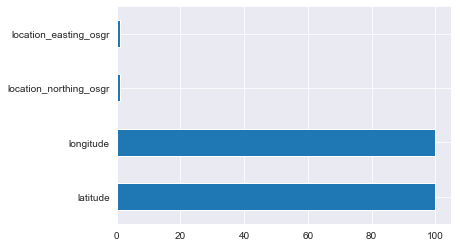

In [45]:
import seaborn as sns
sns.set_style("darkgrid")
Datainfo[Datainfo>0].plot(kind='barh') 

# Selecting Explorartoy Variables for our model

In [46]:
DS1_DS2.head()

,casualty_severity,vehicle_reference,casualty_class,casualty_reference,sex_of_casualty,age_of_casualty,number_of_casualties,speed_limit,car_passenger,did_police_officer_attend_scene_of_accident,light_conditions,weather_conditions,road_surface_conditions,accident_severity
0,3,2,1,1,2,46,1,60,0,2,1,2,2,3
1,3,1,1,1,1,30,1,30,0,1,4,2,2,3
2,3,1,1,1,2,58,6,70,0,1,1,1,1,3
3,3,2,1,3,2,78,6,70,0,1,1,1,1,3
4,3,3,1,2,1,63,6,70,0,1,1,1,1,3


In [47]:
DS1_DS2 = DS1_DS2.loc[:,['casualty_severity','vehicle_reference','casualty_class','casualty_reference','sex_of_casualty',
'age_of_casualty','number_of_casualties','speed_limit','car_passenger',
'did_police_officer_attend_scene_of_accident','light_conditions','weather_conditions',
'road_surface_conditions','accident_severity',]]

DS1_DS2.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

DS1_DS2.shape

(61352, 14)

for reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [48]:
DS1_DS2.head()

,casualty_severity,vehicle_reference,casualty_class,casualty_reference,sex_of_casualty,age_of_casualty,number_of_casualties,speed_limit,car_passenger,did_police_officer_attend_scene_of_accident,light_conditions,weather_conditions,road_surface_conditions,accident_severity
0,3,2,1,1,2,46,1,60,0,2,1,2,2,3
1,3,1,1,1,1,30,1,30,0,1,4,2,2,3
2,3,1,1,1,2,58,6,70,0,1,1,1,1,3
3,3,2,1,3,2,78,6,70,0,1,1,1,1,3
4,3,3,1,2,1,63,6,70,0,1,1,1,1,3


In [49]:
DS1_DS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61352 entries, 0 to 61351
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   casualty_severity                            61352 non-null  int64
 1   vehicle_reference                            61352 non-null  int64
 2   casualty_class                               61352 non-null  int64
 3   casualty_reference                           61352 non-null  int64
 4   sex_of_casualty                              61352 non-null  int64
 5   age_of_casualty                              61352 non-null  int64
 6   number_of_casualties                         61352 non-null  int64
 7   speed_limit                                  61352 non-null  int64
 8   car_passenger                                61352 non-null  int64
 9   did_police_officer_attend_scene_of_accident  61352 non-null  int64
 10  light_conditions      

# Correcting data type

In [50]:
#replacing 'car_passenger' with its actual value
DS1_DS2['car_passenger'] = DS1_DS2['car_passenger'].replace({0: 'No passenger', 1: 'First Class', 
2: 'Second Class', 9:None, -1:None})

In [51]:
#replacing 'sex_of_casualty' with its actual value
DS1_DS2['sex_of_casualty'] = DS1_DS2['sex_of_casualty'].replace({1: 'Male',2:'Female', 9:None,-1:None})

In [52]:
#replacing 'casualty_severity' with its actual value
DS1_DS2['casualty_severity'] = DS1_DS2['casualty_severity'].replace({1:'Fatal',2: 'Serious',3:'Medium'})

In [53]:
#replacing 'casualty_class' with its actual value
DS1_DS2['casualty_class'] = DS1_DS2['casualty_class'].replace({1:'Driver',2:'Passenger',3:'Pedestrian'})

In [54]:
#replacing 'light_conditions' with its actual value
DS1_DS2['light_conditions'] = DS1_DS2['light_conditions'].replace({1: 'Daylight',
4: 'Darkness-lights',5:'Darkness-lights unlit',6:'Darkness-no lighting',7:'Darkness-lighting unknown',99:None, 
-1:None})

In [55]:
#replacing 'weather_conditions' with its actual value
DS1_DS2['weather_conditions'] = DS1_DS2['weather_conditions'].replace({1: 'Sunny',
2: 'Rainy',3:'Snowing',4:'Windy',5:'Cloudy',6:'Foggy',
7:'Lighting', 8:'other',9:'Unknown', -1:'Missing'})


In [56]:
#replacing 'did_police_officer_attend_scene_of_accident' with its actual value
DS1_DS2['did_police_officer_attend_scene_of_accident'] = DS1_DS2['did_police_officer_attend_scene_of_accident'].replace({
1: 'Yes', 2: 'No',3:'Unknown',-1:None})

In [57]:
#replacing 'accident_severity' with its actual value
DS1_DS2['accident_severity'] = DS1_DS2['accident_severity'].replace({1: 'Fatal',2: 'Serious',3:'Medium'})


In [58]:
#replacing 'road_surface_conditions' with its actual value
DS1_DS2['road_surface_conditions'] = DS1_DS2['road_surface_conditions'].replace({1: 'Dry',2: 'Wet',3:'Snow',
4:'frozy',5:'rocky',6:'oil',7:'Mud',9:None, -1:None})

In [59]:
# Our data looks below after given correct values to the catergorical variables.
DS1_DS2.head()

,casualty_severity,vehicle_reference,casualty_class,casualty_reference,sex_of_casualty,age_of_casualty,number_of_casualties,speed_limit,car_passenger,did_police_officer_attend_scene_of_accident,light_conditions,weather_conditions,road_surface_conditions,accident_severity
0,Medium,2,Driver,1,Female,46,1,60,No passenger,No,Daylight,Rainy,Wet,Medium
1,Medium,1,Driver,1,Male,30,1,30,No passenger,Yes,Darkness-lights,Rainy,Wet,Medium
2,Medium,1,Driver,1,Female,58,6,70,No passenger,Yes,Daylight,Sunny,Dry,Medium
3,Medium,2,Driver,3,Female,78,6,70,No passenger,Yes,Daylight,Sunny,Dry,Medium
4,Medium,3,Driver,2,Male,63,6,70,No passenger,Yes,Daylight,Sunny,Dry,Medium


## Renaming of Column

In [60]:
#As an example we are renaming a column precise name in order to recognize the letter properly.
DS1_DS2 = DS1_DS2.rename(columns={"did_police_officer_attend_scene_of_accident":"Police_attendance"})

In [61]:
DS1_DS2.head()

,casualty_severity,vehicle_reference,casualty_class,casualty_reference,sex_of_casualty,age_of_casualty,number_of_casualties,speed_limit,car_passenger,Police_attendance,light_conditions,weather_conditions,road_surface_conditions,accident_severity
0,Medium,2,Driver,1,Female,46,1,60,No passenger,No,Daylight,Rainy,Wet,Medium
1,Medium,1,Driver,1,Male,30,1,30,No passenger,Yes,Darkness-lights,Rainy,Wet,Medium
2,Medium,1,Driver,1,Female,58,6,70,No passenger,Yes,Daylight,Sunny,Dry,Medium
3,Medium,2,Driver,3,Female,78,6,70,No passenger,Yes,Daylight,Sunny,Dry,Medium
4,Medium,3,Driver,2,Male,63,6,70,No passenger,Yes,Daylight,Sunny,Dry,Medium


In [62]:
#To see null values in the data
DS1_DS2.isnull().sum()

casualty_severity            0
vehicle_reference            0
casualty_class               0
casualty_reference           0
sex_of_casualty            458
age_of_casualty              0
number_of_casualties         0
speed_limit                  0
car_passenger              381
Police_attendance            4
light_conditions             0
weather_conditions           0
road_surface_conditions    935
accident_severity            0
dtype: int64

## Relationship Between variables in both datasets

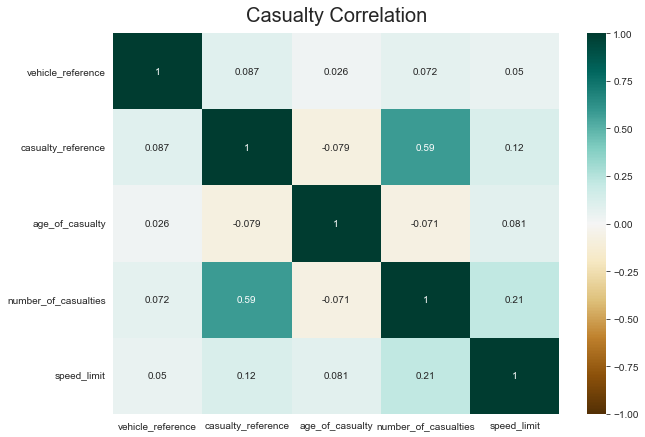

In [63]:
import seaborn as sns
corr = DS1_DS2.corr()
plt.subplots(figsize=(10,7,))
heatmap = sns.heatmap(DS1_DS2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Casualty Correlation', fontdict={'fontsize':20}, pad=12);

## Calculation of missing values

In [64]:
#To see null values in the data
DS1_DS2.isnull().sum()

casualty_severity            0
vehicle_reference            0
casualty_class               0
casualty_reference           0
sex_of_casualty            458
age_of_casualty              0
number_of_casualties         0
speed_limit                  0
car_passenger              381
Police_attendance            4
light_conditions             0
weather_conditions           0
road_surface_conditions    935
accident_severity            0
dtype: int64

In [65]:
DS1_DS2[DS1_DS2['sex_of_casualty'].isnull()].shape[0]* 100 / len(DS1_DS2)

0.7465119311513887

In [66]:
DS1_DS2[DS1_DS2['car_passenger'].isnull()].shape[0]* 100 / len(DS1_DS2)


0.6210066501499544

In [67]:
DS1_DS2[DS1_DS2['road_surface_conditions'].isnull()].shape[0]* 100 / len(DS1_DS2)

1.52399269787456

In [68]:
DS1_DS2.isnull().sum()

casualty_severity            0
vehicle_reference            0
casualty_class               0
casualty_reference           0
sex_of_casualty            458
age_of_casualty              0
number_of_casualties         0
speed_limit                  0
car_passenger              381
Police_attendance            4
light_conditions             0
weather_conditions           0
road_surface_conditions    935
accident_severity            0
dtype: int64

In [69]:
DS1_DS2.dropna(inplace=True)

In [70]:
DS1_DS2.isnull().sum()

casualty_severity          0
vehicle_reference          0
casualty_class             0
casualty_reference         0
sex_of_casualty            0
age_of_casualty            0
number_of_casualties       0
speed_limit                0
car_passenger              0
Police_attendance          0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
accident_severity          0
dtype: int64

In [71]:
DS1_DS2.dtypes

casualty_severity          object
vehicle_reference           int64
casualty_class             object
casualty_reference          int64
sex_of_casualty            object
age_of_casualty             int64
number_of_casualties        int64
speed_limit                 int64
car_passenger              object
Police_attendance          object
light_conditions           object
weather_conditions         object
road_surface_conditions    object
accident_severity          object
dtype: object

In [72]:
DS1_DS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59660 entries, 0 to 61351
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   casualty_severity        59660 non-null  object
 1   vehicle_reference        59660 non-null  int64 
 2   casualty_class           59660 non-null  object
 3   casualty_reference       59660 non-null  int64 
 4   sex_of_casualty          59660 non-null  object
 5   age_of_casualty          59660 non-null  int64 
 6   number_of_casualties     59660 non-null  int64 
 7   speed_limit              59660 non-null  int64 
 8   car_passenger            59660 non-null  object
 9   Police_attendance        59660 non-null  object
 10  light_conditions         59660 non-null  object
 11  weather_conditions       59660 non-null  object
 12  road_surface_conditions  59660 non-null  object
 13  accident_severity        59660 non-null  object
dtypes: int64(5), object(9)
memory usage: 6

## Data Splitting 

We set aside a test part of the dataset as soon as possible, so as to avoid data snooping bias and hence resulting in over-fitting the model to test data. As it can overestimate the accuracy

We'll use 80% of the dataset for training and 20% for evaluation. The split will be done using stratified sampling to ensure the distributions of the "Casualty Severity" values are similar in the training and test set.

In Python, the stratify parameter is often used in machine learning tasks to ensure that the distribution of classes in the training and testing sets is proportional to the overall distribution of classes in the entire dataset.

In [73]:
from sklearn.model_selection import train_test_split
trainingdata, testingdata = train_test_split(DS1_DS2, test_size=0.2, random_state=7, shuffle=False)

In [74]:
print(f"{trainingdata.shape[0]} train and {testingdata.shape[0]} test instances")

47728 train and 11932 test instances


# Checking of the data similarity and comparision

In [75]:
trainingdata["casualty_severity"].value_counts(normalize=True)

Medium     0.792784
Serious    0.193807
Fatal      0.013409
Name: casualty_severity, dtype: float64

In [76]:
testingdata["casualty_severity"].value_counts(normalize=True)

Medium     0.792072
Serious    0.195441
Fatal      0.012487
Name: casualty_severity, dtype: float64

In [77]:
# In this case we can present the size of our training and testing datas.
trainingdata.shape

(47728, 14)

In [78]:
testingdata.shape

(11932, 14)

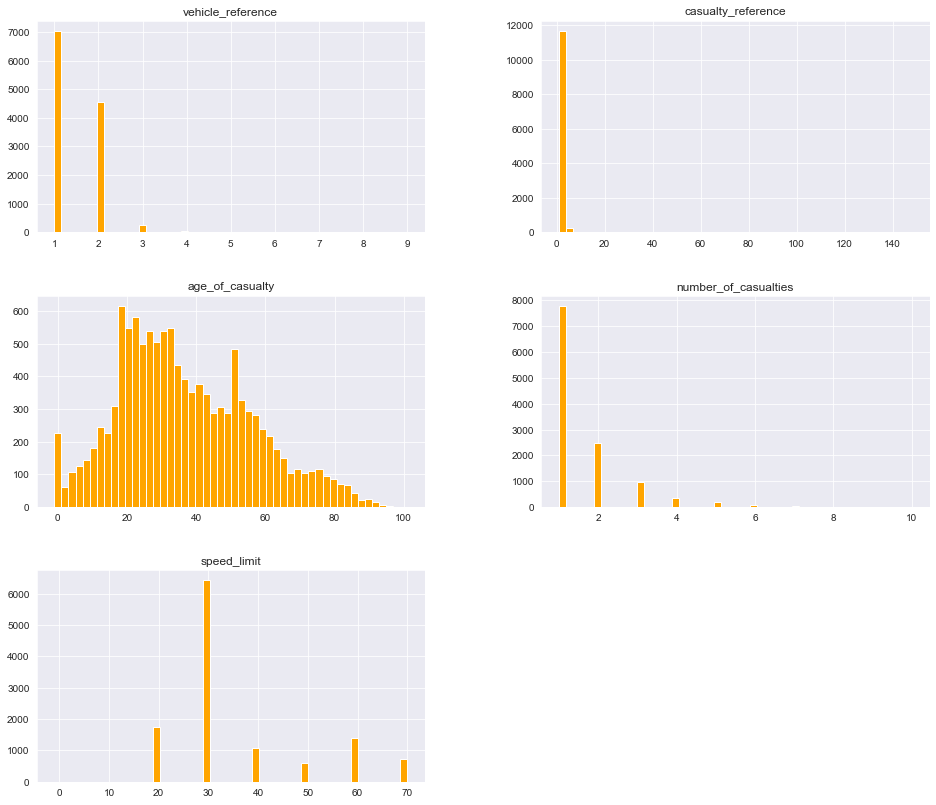

In [79]:
Histogram = testingdata.hist(bins=50, figsize=(16,14), color = "orange")

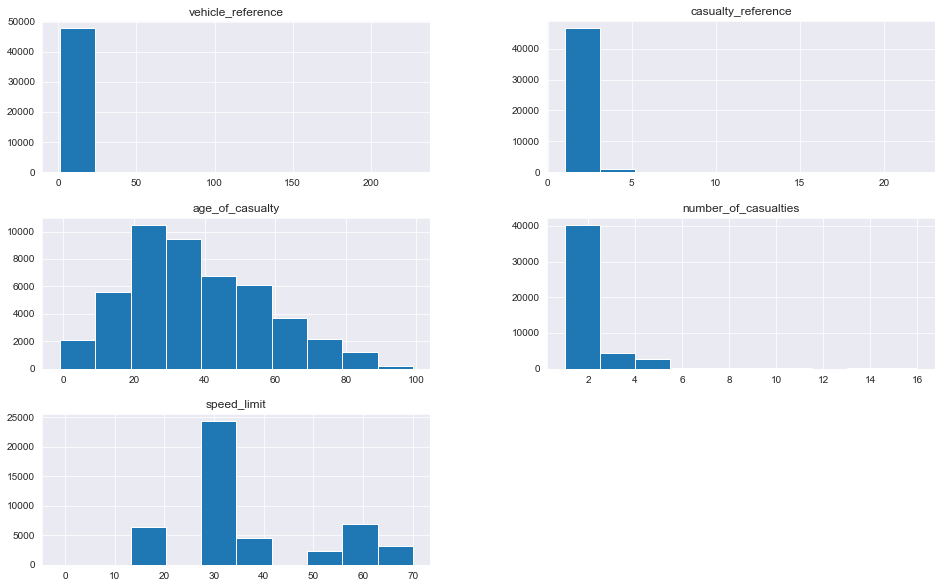

In [80]:
trainingdata.hist(edgecolor='white', linewidth=1)
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()

#### Statistic and Distribution of Categorical and Numerical Independent Variables

In [81]:
Numerical = DS1_DS2.select_dtypes(include='int64')
Numerical.head()

,vehicle_reference,casualty_reference,age_of_casualty,number_of_casualties,speed_limit
0,2,1,46,1,60
1,1,1,30,1,30
2,1,1,58,6,70
3,2,3,78,6,70
4,3,2,63,6,70


In [82]:
Numerical.shape

(59660, 5)

<AxesSubplot:ylabel='Frequency'>

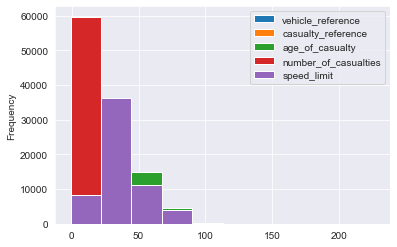

In [83]:
Numerical.plot(kind='hist')

In [84]:
#using describe to get the descriptive statistics.
Numerical['vehicle_reference'].describe()

count    59660.000000
mean         1.452883
std          1.121662
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        227.000000
Name: vehicle_reference, dtype: float64

<AxesSubplot:>

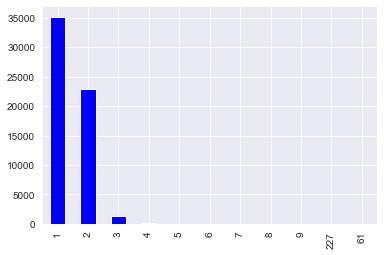

In [85]:
Numerical['vehicle_reference'].value_counts().plot(kind='bar',color="blue")

In [86]:
Numerical['speed_limit'].describe()

count    59660.000000
mean        37.247335
std         14.799837
min         -1.000000
25%         30.000000
50%         30.000000
75%         50.000000
max         70.000000
Name: speed_limit, dtype: float64

<AxesSubplot:>

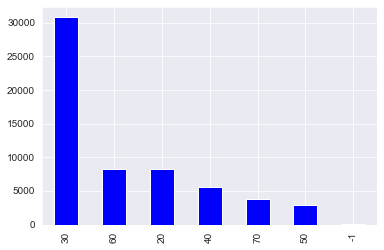

In [87]:
Numerical['speed_limit'].value_counts().plot(kind='bar',color="blue")

In [88]:
Numerical['age_of_casualty'].describe()

count    59660.000000
mean        37.018605
std         19.436822
min         -1.000000
25%         22.000000
50%         34.000000
75%         51.000000
max        101.000000
Name: age_of_casualty, dtype: float64

<AxesSubplot:>

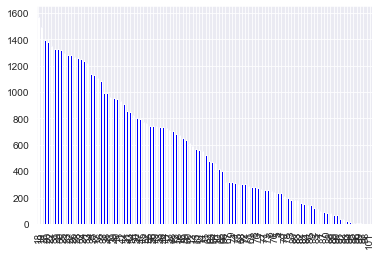

In [89]:
Numerical['age_of_casualty'].value_counts().plot(kind='bar',color="blue")

In [90]:
Categorical = DS1_DS2.select_dtypes(include='object')
Categorical.head()

,casualty_severity,casualty_class,sex_of_casualty,car_passenger,Police_attendance,light_conditions,weather_conditions,road_surface_conditions,accident_severity
0,Medium,Driver,Female,No passenger,No,Daylight,Rainy,Wet,Medium
1,Medium,Driver,Male,No passenger,Yes,Darkness-lights,Rainy,Wet,Medium
2,Medium,Driver,Female,No passenger,Yes,Daylight,Sunny,Dry,Medium
3,Medium,Driver,Female,No passenger,Yes,Daylight,Sunny,Dry,Medium
4,Medium,Driver,Male,No passenger,Yes,Daylight,Sunny,Dry,Medium


In [91]:
Categorical.shape

(59660, 9)

## Target Variable Statistic and Distribution

In [92]:
#using describe to get the descriptive statistics.
Categorical['casualty_severity'].describe()

count      59660
unique         3
top       Medium
freq       47289
Name: casualty_severity, dtype: object

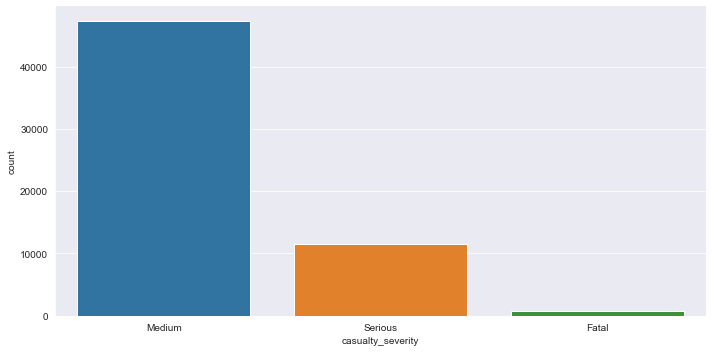

In [93]:
import seaborn as sns
sns.catplot(x='casualty_severity', data=Categorical, kind='count', aspect=2);
plt.tight_layout();

#### Exploratory Variables Statistic and Distribution as Sample from Dataset

In [94]:
# Statistic for casualty class
Categorical['casualty_class'].describe()

count      59660
unique         3
top       Driver
freq       39889
Name: casualty_class, dtype: object

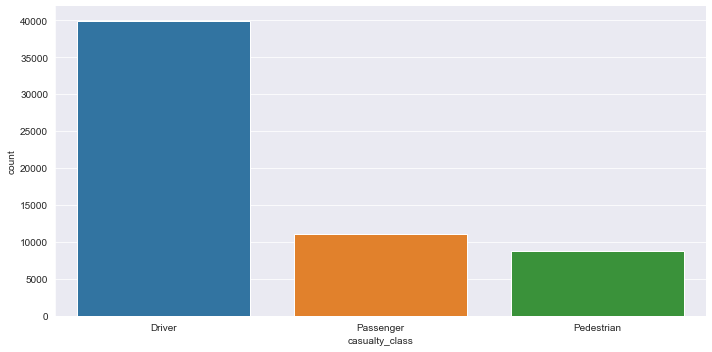

In [95]:
# Plot for casualty class
sns.catplot(x='casualty_class', data=Categorical, kind='count', aspect=2);
plt.tight_layout();

In [96]:
# Statistic for road surface and condition
Categorical['road_surface_conditions'].describe()

count     59660
unique        5
top         Dry
freq      46806
Name: road_surface_conditions, dtype: object

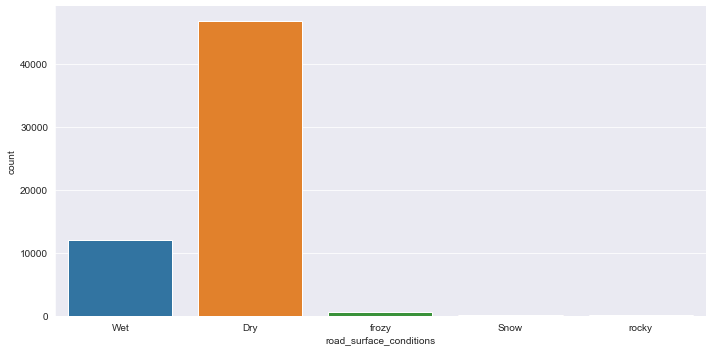

In [97]:
# Plot for road surface and condition
sns.catplot(x='road_surface_conditions', data=Categorical, kind='count', aspect=2);
plt.tight_layout();

In [98]:
#checking the number of NaN for each column
trainingdata.isnull().sum()

casualty_severity          0
vehicle_reference          0
casualty_class             0
casualty_reference         0
sex_of_casualty            0
age_of_casualty            0
number_of_casualties       0
speed_limit                0
car_passenger              0
Police_attendance          0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
accident_severity          0
dtype: int64

In [99]:
# Checking the number of NaNs in the test set per column
testingdata.isnull().sum()

casualty_severity          0
vehicle_reference          0
casualty_class             0
casualty_reference         0
sex_of_casualty            0
age_of_casualty            0
number_of_casualties       0
speed_limit                0
car_passenger              0
Police_attendance          0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
accident_severity          0
dtype: int64

In [100]:
#checking datatype
testingdata.dtypes

casualty_severity          object
vehicle_reference           int64
casualty_class             object
casualty_reference          int64
sex_of_casualty            object
age_of_casualty             int64
number_of_casualties        int64
speed_limit                 int64
car_passenger              object
Police_attendance          object
light_conditions           object
weather_conditions         object
road_surface_conditions    object
accident_severity          object
dtype: object

In [101]:
from sklearn.base import TransformerMixin, BaseEstimator 
class OutlierTransformer(TransformerMixin, BaseEstimator):

    def __init__(self):
        self.fitted = False
        return None

    def fit(self, X):
        #Selecting and handling outliers for only the columns containing numerical variables
        numerics = ['int16', 'int32', 'int64']
        numeric_X = X.select_dtypes(include=numerics)
        # Get Quantiles and Inter Quartile Range
        self.quantiles = pd.DataFrame(numeric_X.quantile([0.25, 0.75]))
        self.quantiles.loc['IQR',:] = self.quantiles.loc[0.75,:] - self.quantiles.loc[0.25,:]
        #Calculate Upper and Lower Bounds
        #These bounds are calculated on the Train Dataset, then applied to the train and test datasets
        self.quantiles.loc['Lower_Bound',:] = self.quantiles.loc[0.25,:] - 1.5 * self.quantiles.loc['IQR',:]
        self.quantiles.loc['Upper_Bound',:] = self.quantiles.loc[0.75,:] + 1.5 * self.quantiles.loc['IQR',:]
        #Save fitting status
        self.fitted = True
        return self

    def transform(self, X):
        if self.fitted == False:
            print('The transformer must be fitted before transformation.')
            return None
            #Make a copy of X to avoid mutating X
        X_copy = X.copy()
        #Old number of NaNs to count number of outliers
        old_num_na = sum(X_copy.isna().sum())
        for col in self.quantiles.columns:
            #Fill Beyond Lower Bound
            X_copy.loc[X_copy.loc[:,col] < self.quantiles.loc['Lower_Bound',col],col] = np.NaN
            #Fill Beyond Upper Bound
            X_copy.loc[X_copy.loc[:,col] > self.quantiles.loc['Upper_Bound',col],col] = np.NaN
            #Print Number of Outliers
            print(str(sum(X_copy.isna().sum()) - old_num_na) + ' Outliers are Identified.')
        return X_copy


In [102]:
# OutlierTransformer() function is called then fitted on the trainset

outlier_transformer = OutlierTransformer()
trainset = outlier_transformer.fit_transform(trainingdata)

# All the outliers were transformed as NaN

260 Outliers are Identified.
10742 Outliers are Identified.
10758 Outliers are Identified.
13926 Outliers are Identified.
13971 Outliers are Identified.


In [103]:
#checking the number of NaN for each column
trainingdata.isnull().sum()

casualty_severity          0
vehicle_reference          0
casualty_class             0
casualty_reference         0
sex_of_casualty            0
age_of_casualty            0
number_of_casualties       0
speed_limit                0
car_passenger              0
Police_attendance          0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
accident_severity          0
dtype: int64

In [104]:
#Transform the outliers in the test set into NaNs
trainingdata = outlier_transformer.transform(trainingdata)

260 Outliers are Identified.
10742 Outliers are Identified.
10758 Outliers are Identified.
13926 Outliers are Identified.
13971 Outliers are Identified.


In [105]:
# Checking the number of NaNs in the test set per column
trainingdata.isnull().sum()

casualty_severity              0
vehicle_reference            260
casualty_class                 0
casualty_reference         10482
sex_of_casualty                0
age_of_casualty               16
number_of_casualties        3168
speed_limit                   45
car_passenger                  0
Police_attendance              0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
accident_severity              0
dtype: int64

In [106]:
#checking datatype
trainingdata.dtypes

casualty_severity           object
vehicle_reference          float64
casualty_class              object
casualty_reference         float64
sex_of_casualty             object
age_of_casualty            float64
number_of_casualties       float64
speed_limit                float64
car_passenger               object
Police_attendance           object
light_conditions            object
weather_conditions          object
road_surface_conditions     object
accident_severity           object
dtype: object

In [107]:
trainingdata["vehicle_reference"].fillna(trainingdata["vehicle_reference"].median(), inplace=True)
trainingdata["casualty_reference"].fillna(trainingdata["casualty_reference"].median(), inplace=True)
trainingdata["age_of_casualty"].fillna(trainingdata["age_of_casualty"].median(), inplace=True)
trainingdata["number_of_casualties"].fillna(trainingdata["number_of_casualties"].median(), inplace=True)
trainingdata["speed_limit"].fillna(trainingdata["speed_limit"].median(), inplace=True)

In [108]:
trainingdata.head(3)

,casualty_severity,vehicle_reference,casualty_class,casualty_reference,sex_of_casualty,age_of_casualty,number_of_casualties,speed_limit,car_passenger,Police_attendance,light_conditions,weather_conditions,road_surface_conditions,accident_severity
0,Medium,2.0,Driver,1.0,Female,46.0,1.0,60.0,No passenger,No,Daylight,Rainy,Wet,Medium
1,Medium,1.0,Driver,1.0,Male,30.0,1.0,30.0,No passenger,Yes,Darkness-lights,Rainy,Wet,Medium
2,Medium,1.0,Driver,1.0,Female,58.0,1.0,70.0,No passenger,Yes,Daylight,Sunny,Dry,Medium


In [109]:
trainingdata.isnull().sum()

casualty_severity          0
vehicle_reference          0
casualty_class             0
casualty_reference         0
sex_of_casualty            0
age_of_casualty            0
number_of_casualties       0
speed_limit                0
car_passenger              0
Police_attendance          0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
accident_severity          0
dtype: int64

In [110]:
testingdata["vehicle_reference"].fillna(testingdata["vehicle_reference"].median(), inplace=True)
testingdata["casualty_reference"].fillna(testingdata["casualty_reference"].median(), inplace=True)
testingdata["age_of_casualty"].fillna(testingdata["age_of_casualty"].median(), inplace=True)
testingdata["number_of_casualties"].fillna(testingdata["number_of_casualties"].median(), inplace=True)
testingdata["speed_limit"].fillna(testingdata["speed_limit"].median(), inplace=True)

In [111]:
testingdata.isnull().sum()

casualty_severity          0
vehicle_reference          0
casualty_class             0
casualty_reference         0
sex_of_casualty            0
age_of_casualty            0
number_of_casualties       0
speed_limit                0
car_passenger              0
Police_attendance          0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
accident_severity          0
dtype: int64

# Citing this notebook

If you use this notebook in your work, please cite it as follows:
    
Pekar, V. (2022). Big Data for Decision Making. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/vpekar/bd4dm
